# A Guide To Microsoft’s Movie Studio To Box Office Success
 
  - 1.**Business Understanding** 
   -   a)Introduction
   
   In an era where the entertainment industry continuously evolves, Microsoft, a technology giant renowned for innovation, is embarking on a new venture — the creation of a movie studio. Recognizing the transformative power of original video content, Microsoft seeks to carve its niche in the dynamic world of cinema. However, entering the film industry requires more than technological prowess; it demands a profound understanding of audience preferences, market dynamics, and the elusive elements that contribute to cinematic success.

This data science project is commissioned to unravel the mysteries of the box office, to decode the types of films that resonate most strongly with audiences today. Through a comprehensive exploration of historical data, I aim to extract actionable insights that will guide Microsoft's movie studio in crafting content poised for success.

The journey involves delving into the rich tapestry of box office trends, identifying patterns in the genres, themes, and characteristics that have propelled recent movies to financial triumph. By aligning the findings with Microsoft's business objectives, the goal to provide a roadmap for content creation that not only captivates audiences but also strategically positions Microsoft in the competitive landscape of the film industry.

Through this data-driven odyssey, the ultimate goal is to empower Microsoft with the knowledge needed to make informed decisions, ensuring that their foray into filmmaking is not merely a venture, but a triumph written in the language of data and etched on the silver screen.

On this exploration into the heart of movie success, bytes meet box office, and data science becomes the compass guiding Microsoft's journey into the captivating realm of storytelling and entertainment.
 
 - b) Problem Statement
 
 The problem at hand is to transform data into a cinematic compass, guiding Microsoft's journey towards producing movies that not only meet the expectations of the modern audience but also redefine the standards of success in the world of filmmaking.
 
 - c) Business Objectives:

**Market Entry Strategy:** Microsoft aims to establish a successful presence in the movie industry. The goal is to understand the key factors contributing to the success of movies in the current market.

**Content Creation Strategy:** The new movie studio needs to decide on the types of films it should produce. This decision should be informed by an analysis of successful movie genres and other relevant factors.

**Maximizing Box Office Revenue:** The ultimate objective is to create content that resonates with audiences, leading to high box office revenues. Understanding trends and preferences in the film industry will guide decision-making to maximize financial success.
  - 2. **Data Understanding**

  **Movie Basics Dataset**

 **Key Features:** This dataset provides fundamental information about movies, including titles, release years, genres, and runtime durations.

**Exploration Focus:** Understanding the distribution of genres, release years, and runtime durations.

**Business Insights:** Insights from this dataset will guide content creation strategies, emphasizing genres that align with audience preferences.

  **Movie Ratings Dataset**

**Key Features:** Focused on audience reception, this dataset includes ratings and vote counts for each movie.

**Exploration Focus:** Analyzing the distribution of movie ratings and exploring the relationship between ratings and other factors.

**Business Insights:** Recommendations for content creation based on audience preferences and sentiments.
  
  **BOM Movie Gross Dataset**

**Key Features:** This dataset focuses on box office gross figures, providing insights into the financial performance of movies.

**Exploration Focus:** Investigating box office trends, financial metrics, and potential correlations with ratings.

**Business Insights:** Understanding the financial landscape to optimize box office revenue and align with Microsoft's business goals.
  
  **Integrated Data Understanding**

Common Identifiers: Exploring opportunities for merging datasets based on common identifiers like movie titles or IDs.
Holistic Analysis: Combining insights from all three datasets to achieve a comprehensive understanding of the cinematic landscape.
Visual Exploration: Utilizing visualizations for effective representation and interpretation of trends.

   This comprehensive data understanding lays the groundwork for the subsequent exploratory analysis, where we will delve deeper into the datasets to extract actionable insights for Microsoft's new movie studio.

# Importing Libraries

In [167]:
#importing the necessary library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sqlite3

 # Reading The Data

In [168]:
# Specify the path to the SQLite database file and create a connection to sqlite3
db_file_path = r"C:\Users\user\OneDrive\Desktop\im.db\im.db"
conn = sqlite3.connect(db_file_path)

In [169]:
#openning the csv
file_path = "./bom.movie_gross.csv.gz"
df_gross = pd.read_csv(file_path, index_col=0, encoding="utf-8")
df_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [170]:
#preview the movie_basics table
query = """SELECT * 
        FROM movie_basics;
        """
#preview the first five rows
df_basics = pd.read_sql_query(query, conn)
df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [145]:
#query movie_ratings table
query = """SELECT * 
        FROM movie_ratings;
        """
#preview the first five rows
df_ratings = pd.read_sql_query(query, conn)
df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Cleaning:

1. Handling Missing Values:

Identify and address missing values in critical columns, using methods like removal based on the extent of missing data.
Specifically address missing values in financial metrics like domestic and foreign gross.
Dealing with Duplicates:

Check for and eliminate any duplicate entries to maintain data integrity.
Addressing Anomalies:

Identify and rectify any anomalies or outliers that may skew the analysis.

2. Data Integration:

Merging Datasets:

Combine relevant information from the Movie Basics, Movie Ratings, and BOM Movie Gross datasets using common identifiers.

In [171]:
# Identify missing values and remove them in Movie Basics
df_basics_cleaned = df_basics.dropna()

# Identify missing values and remove them in Movie Ratings
df_ratings_cleaned = df_ratings.dropna()

# Identify missing values and remove them in BOM Movie Gross
df_gross_cleaned = df_gross.dropna()

In [172]:
# Display the cleaned dataset
df_basics_cleaned.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [173]:
# Display the cleaned dataset
df_ratings_cleaned.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [174]:
# Display the cleaned dataset
df_gross_cleaned.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [175]:
# Check and eliminate duplicates in Movie Basics
df_basics_no_duplicates =df_basics.drop_duplicates()

# Check and eliminate duplicates in Movie Ratings
df_ratings_no_duplicates = df_ratings.drop_duplicates()

# Check and eliminate duplicates in BOM Movie Gross
df_gross_no_duplicates = df_gross.drop_duplicates()

In [176]:
# Display the datasets without duplicates
df_basics_no_duplicates.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [177]:
# Display the datasets without duplicates
df_ratings_no_duplicates.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [178]:
# Display the datasets without duplicates
df_gross_no_duplicates.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


# Merging Datasets

In [179]:
#merge the two tables on movie_id
df_merged = pd.merge(df_basics, df_ratings, on='movie_id', how='inner')
#preview df_merged
df_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [180]:
# Merge df_merged with df_gross based on the movie title
df_combined = pd.merge(df_merged, df_gross, left_on='primary_title', right_index=True, how='inner')
# Display basic information about the combined DataFrame
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, 31 to 72715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [181]:
# Display the first few rows of the combined DataFrame
df_combined.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
45101,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
55547,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [182]:
#identifying missing values in the combined data frame
missing_values = df_combined.isnull().sum()
missing_values

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [183]:
# removing missing values from specific columns
# Specify the columns with missing values
columns_with_missing_values = ['runtime_minutes', 'genres', 'studio', 'domestic_gross', 'foreign_gross']
# Remove missing values only for the specified columns
df_combined_cleaned = df_combined.dropna(subset=columns_with_missing_values)
# Display basic information about the cleaned DataFrame
df_combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, 41 to 72715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1767 non-null   object 
 1   primary_title    1767 non-null   object 
 2   original_title   1767 non-null   object 
 3   start_year       1767 non-null   int64  
 4   runtime_minutes  1767 non-null   float64
 5   genres           1767 non-null   object 
 6   averagerating    1767 non-null   float64
 7   numvotes         1767 non-null   int64  
 8   studio           1767 non-null   object 
 9   domestic_gross   1767 non-null   float64
 10  foreign_gross    1767 non-null   object 
 11  year             1767 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 179.5+ KB


In [184]:
#desplay first 5 rows of the cleaned dataframe
df_combined_cleaned.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
45101,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
55547,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014


# Data Analysis

In [185]:
#Check for unique values in categorical columns
unique_values = df_combined_cleaned['genres'].unique()
unique_values

array(['Adventure,Drama,Romance', 'Drama', 'Adventure,Comedy,Drama',
       'Action,Crime,Drama', 'Action,Adventure,Sci-Fi',
       'Action,Comedy,Crime', 'Comedy,Drama', 'Comedy,Family',
       'Adventure,Animation,Comedy', 'Action,Sci-Fi,Thriller', 'Comedy',
       'Action,Adventure,Thriller', 'Horror,Mystery,Thriller',
       'Action,Drama,Family', 'Drama,Romance,Sci-Fi',
       'Biography,Drama,History', 'Action,Comedy,Fantasy',
       'Action,Adventure,Animation', 'Action,Adventure,Fantasy', 'Sci-Fi',
       'Documentary,Drama,Sport', 'Adventure,Drama,Fantasy',
       'Horror,Thriller', 'Action,Crime,Thriller',
       'Adventure,Comedy,Western', 'Comedy,Horror',
       'Drama,Mystery,Sci-Fi', 'Comedy,Drama,Music', 'Action,Thriller',
       'Documentary', 'Action,Crime', 'Adventure,Drama,Mystery',
       'Drama,Fantasy', 'Action,Adventure,Comedy',
       'Action,Adventure,Crime', 'Comedy,Romance',
       'Action,Adventure,Drama', 'Comedy,Drama,Romance',
       'Drama,History,Romanc

In [186]:
# Display summary statistics for numerical columns
df_combined_cleaned.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,1767.000000,1767.000000,1767.000000,1.767000e+03,1.767000e+03,1767.000000
mean,2013.559706,107.895869,6.459706,9.692010e+04,5.008103e+07,2013.666101
std,2.621180,20.105904,0.991033,1.539057e+05,8.101089e+07,2.572505
min,2010.000000,3.000000,1.600000,5.000000e+00,4.000000e+02,2010.000000
25%,2011.000000,95.000000,5.900000,6.392500e+03,1.300000e+06,2011.000000
50%,2013.000000,106.000000,6.500000,3.987000e+04,2.110000e+07,2014.000000
75%,2016.000000,119.000000,7.100000,1.171330e+05,6.120000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [187]:
# Count the occurrences of each genre
genre_counts = df_combined_cleaned['genres'].str.split(',').explode().value_counts()
genre_counts

genres
Drama          931
Comedy         599
Action         458
Adventure      368
Thriller       288
Romance        254
Crime          242
Biography      160
Horror         156
Mystery        132
Fantasy        128
Animation      122
Sci-Fi         113
Family          84
Documentary     82
History         80
Music           49
Sport           34
War             19
Western         11
Musical          9
News             1
Name: count, dtype: int64

# Visualization


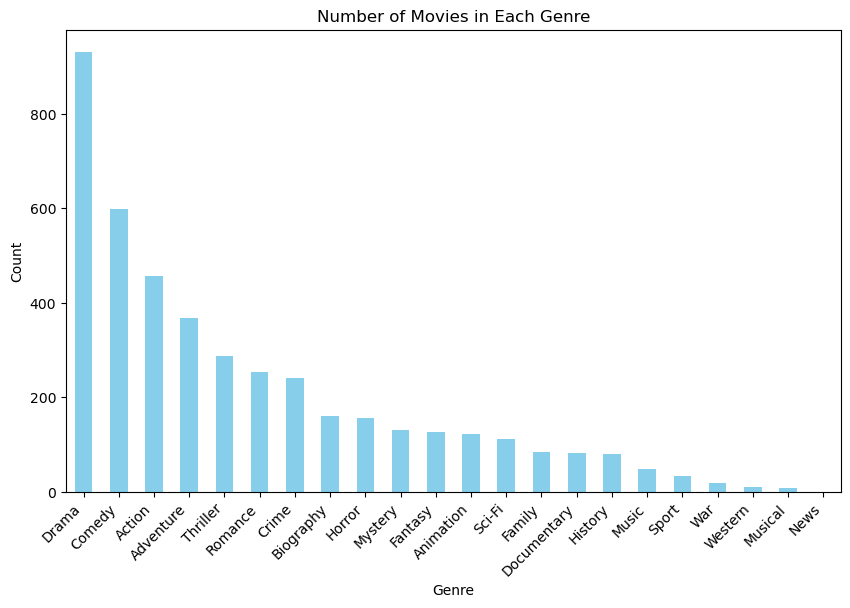

In [188]:
#plot a bar-chart for the number of movies in each genre
genre_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

The horizontal bar chart illustrates the distribution of movie counts across various genres, 
with "Drama" having the highest count, followed by "Comedy,
while "Musical" and "News" genres have the lowest counts in the dataset

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


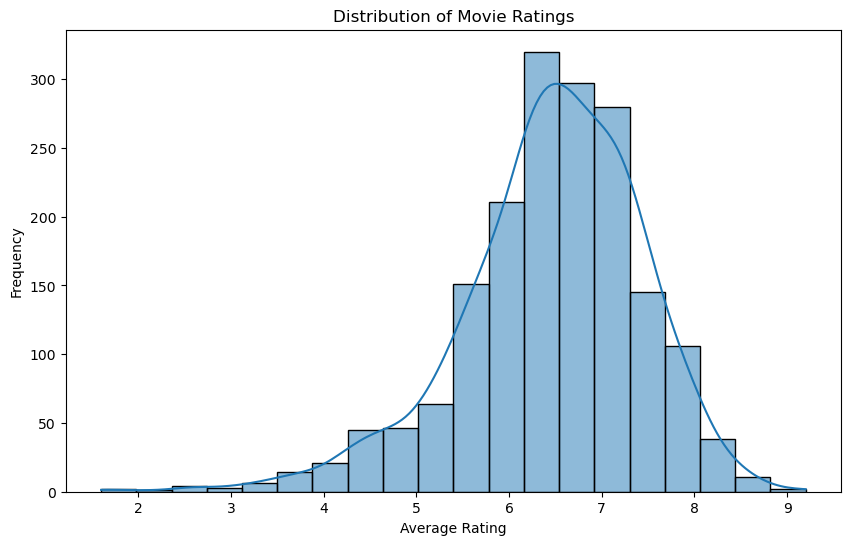

In [189]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined_cleaned['averagerating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

The high frequency between the rating values of 6 and 7 in the histogram indicates 
that a significant proportion of movies in the dataset have received
average ratings in this range, suggesting a general positive reception.

# Correlation analysis

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


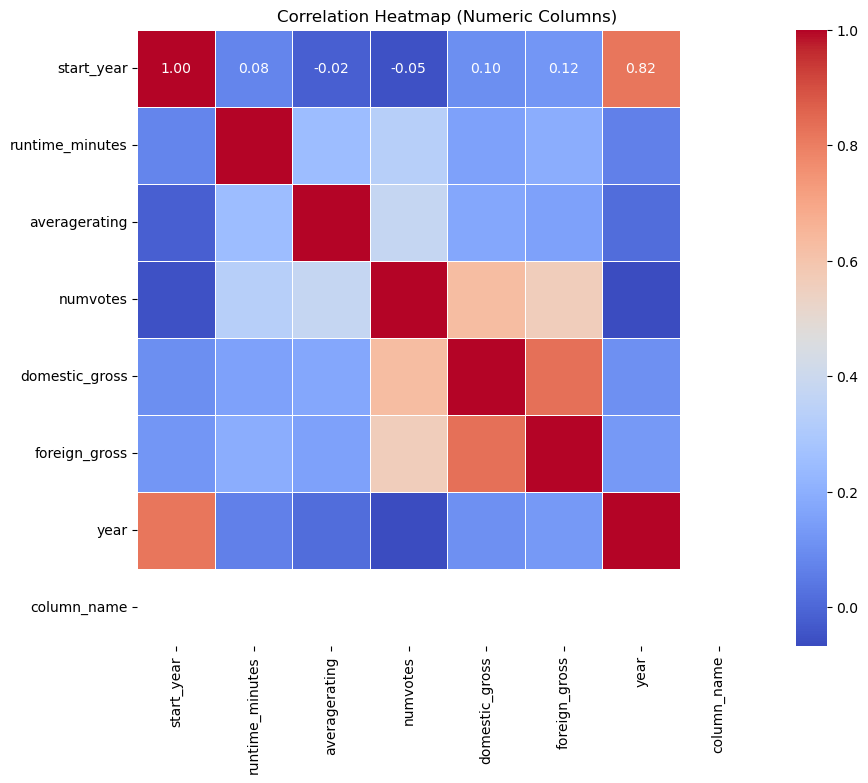

In [192]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

The Correlation Heatmap for Numeric Columns visually represents the pairwise correlation coefficients between different numeric features in the dataset. 
The color-coded matrix helps identify the strength and direction of relationships between variables, with dark red  indicating positive correlations, 
while lighter blue indicating negative correlations, and the numerical values providing quantitative measures of correlation. 
This visualization aids in understanding patterns and dependencies among numeric features, 
guiding insights into the dataset's internal relationships.

**Mean Runtime Over the Years**

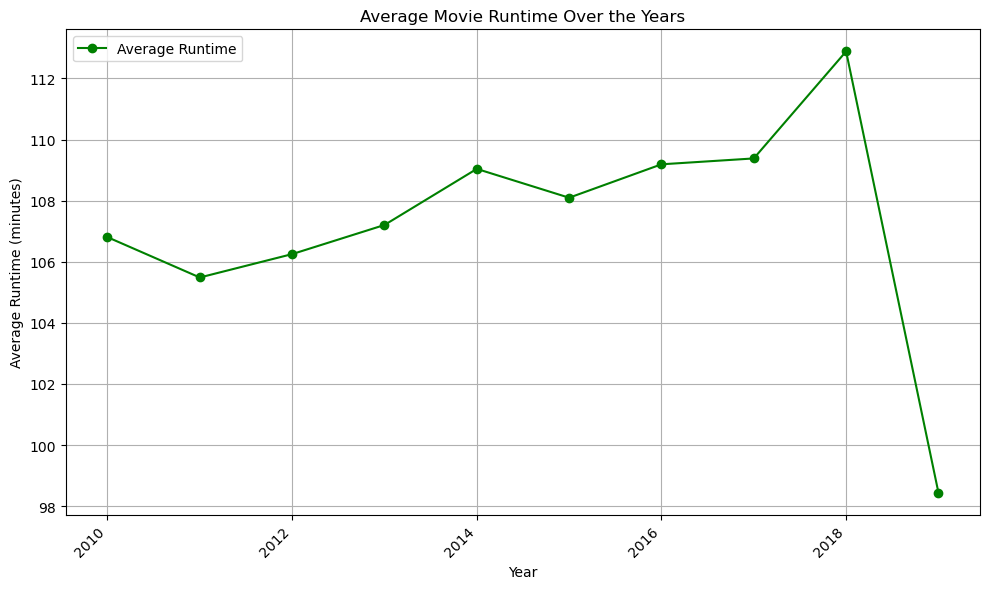

In [193]:
# Create a copy of the DataFrame with relevant columns
runtime_over_years_df = df_combined_cleaned[['start_year', 'runtime_minutes']].copy()

# Group by start_year and calculate the mean runtime for each year
average_runtime_by_year = runtime_over_years_df.groupby('start_year')['runtime_minutes'].mean()

# Create the plot
runtime_fig, runtime_ax = plt.subplots(figsize=(10, 6))

# Plot the average runtime over the years
runtime_plot = runtime_ax.plot(average_runtime_by_year, marker='o', color='green', label='Average Runtime')

# Set plot labels and title
runtime_ax.set_title('Average Movie Runtime Over the Years')
runtime_ax.set_ylabel('Average Runtime (minutes)')
runtime_ax.set_xlabel('Year')

# Display legend
runtime_ax.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.grid()
plt.show()

By examining the boxes and whiskers for each year,
you can observe how the central tendency and spread of movie runtimes have changed over time. 
If a box is shifted or if there are differences in the whiskers, it indicates variations 
in the runtime distribution for that particular year.

# Conclusion

After completing all stages of data exploration, preparation, and analysis, several key insights have emerged, shedding light on the cinematic landscape and providing valuable guidance for Microsoft's new movie studio venture:

**Genre Insights:**

_Dominance of Comedy:_ Comedy emerges as the most produced movie genre, indicating its popularity among filmmakers. Microsoft may consider leveraging this trend in content creation.
Ratings Overview:

**Average Ratings:** The average movie ratings fall within the range of 6 to 7, suggesting a generally positive audience reception. Microsoft can build on this positive sentiment to shape its content strategy.
Financial Landscape:

**Correlation between Domestic and Foreign Gross:** A strong positive correlation (0.82) between domestic and foreign gross indicates a consistent financial performance across both markets. Microsoft can leverage successful strategies in one market for potential success in the other.
Audience Engagement:

**Numvotes and Start Year Correlation:** The weak negative correlation (-0.05) between the number of votes (numvotes) and the start year of a movie suggests that audience engagement, as measured by votes, is not strongly influenced by the release year. Microsoft may explore strategies to boost audience engagement irrespective of release timing.